In [43]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Preprocessed data
train_validate = pd.read_csv("../Data/train_validate.csv")

Text(0.5, 1.0, 'Correlation Matrix')

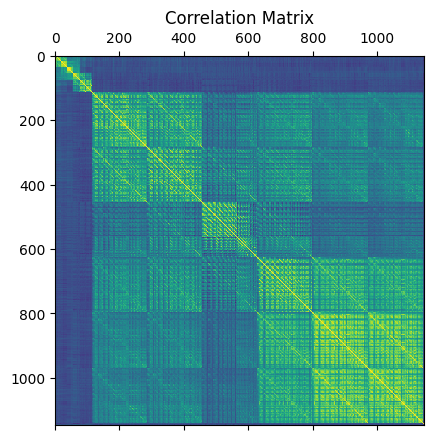

In [45]:
# Correlation matrix with all the variables
corr = train_validate.corr()
corr.to_numpy()
fig, ax = plt.subplots()
ax.matshow(corr)
ax.set_title("Correlation Matrix")

In [46]:
# List all indexed values

# for i, c in enumerate(corr.columns):
#     print(i,c)

# delta theta alpha beta highbeta gamma

Text(0.5, 1.0, 'Correlation Matrix')

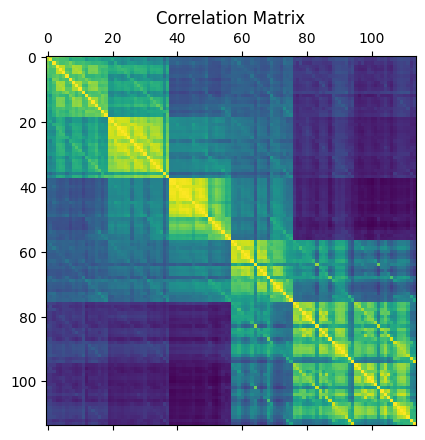

In [47]:
# Correlation matrix with only the AB variables

psd_corr = train_validate[[col for col in train_validate.columns if col.startswith("AB")]].corr()
psd_corr.to_numpy()
fig, ax = plt.subplots()
ax.matshow(psd_corr)
ax.set_title("Correlation Matrix")

['AB.A.delta.a.FP1', 'AB.B.theta.a.FP1', 'AB.C.alpha.a.FP1', 'AB.D.beta.a.FP1', 'AB.E.highbeta.a.FP1', 'AB.F.gamma.a.FP1', 'AB.A.delta.b.FP2', 'AB.B.theta.b.FP2', 'AB.C.alpha.b.FP2', 'AB.D.beta.b.FP2', 'AB.E.highbeta.b.FP2', 'AB.F.gamma.b.FP2', 'AB.A.delta.c.F7', 'AB.B.theta.c.F7', 'AB.C.alpha.c.F7', 'AB.D.beta.c.F7', 'AB.E.highbeta.c.F7', 'AB.F.gamma.c.F7', 'AB.A.delta.e.Fz', 'AB.B.theta.e.Fz', 'AB.C.alpha.e.Fz', 'AB.D.beta.e.Fz', 'AB.E.highbeta.e.Fz', 'AB.F.gamma.e.Fz', 'AB.A.delta.f.F4', 'AB.B.theta.f.F4', 'AB.C.alpha.f.F4', 'AB.D.beta.f.F4', 'AB.E.highbeta.f.F4', 'AB.F.gamma.f.F4', 'AB.A.delta.g.F8', 'AB.B.theta.g.F8', 'AB.C.alpha.g.F8', 'AB.D.beta.g.F8', 'AB.E.highbeta.g.F8', 'AB.F.gamma.g.F8', 'AB.A.delta.h.T3', 'AB.B.theta.h.T3', 'AB.C.alpha.h.T3', 'AB.D.beta.h.T3', 'AB.E.highbeta.h.T3', 'AB.F.gamma.h.T3', 'AB.A.delta.i.C3', 'AB.B.theta.i.C3', 'AB.C.alpha.i.C3', 'AB.D.beta.i.C3', 'AB.E.highbeta.i.C3', 'AB.F.gamma.i.C3', 'AB.A.delta.j.Cz', 'AB.B.theta.j.Cz', 'AB.C.alpha.j.Cz', 'A

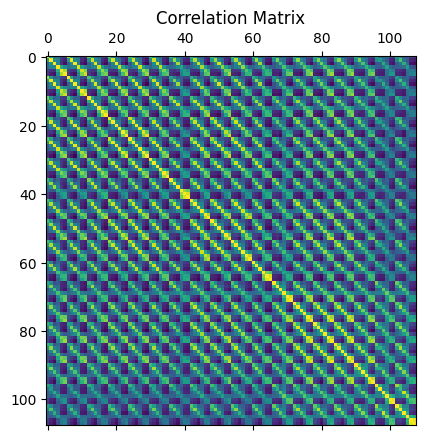

In [48]:
cols = []
locations = "abcefghijklmnopqrs"
for loc in locations:
    cols.extend([col for col in train_validate.columns if "." + loc + "." in col])
cols = [col for col in cols if "AB" in col]
loc_sorted = train_validate[cols].corr().to_numpy()
fig, ax = plt.subplots()
ax.matshow(loc_sorted)
ax.set_title("Correlation Matrix")
print(cols)

['AB.A.delta.a.FP1', 'AB.B.theta.a.FP1', 'AB.C.alpha.a.FP1', 'AB.D.beta.a.FP1', 'AB.E.highbeta.a.FP1', 'AB.F.gamma.a.FP1', 'AB.A.delta.e.Fz', 'AB.B.theta.e.Fz', 'AB.C.alpha.e.Fz', 'AB.D.beta.e.Fz', 'AB.E.highbeta.e.Fz', 'AB.F.gamma.e.Fz']


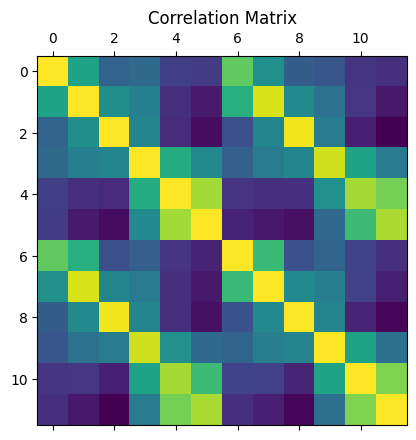

In [49]:
cols = []
locations = "ae"
for loc in locations:
    cols.extend([col for col in train_validate.columns if "." + loc + "." in col])
cols = [col for col in cols if "AB" in col]
loc_sorted = train_validate[cols].corr().to_numpy()
fig, ax = plt.subplots()
ax.matshow(loc_sorted)
ax.set_title("Correlation Matrix")
print(cols)

Text(0.5, 1.0, 'Correlation Matrix')

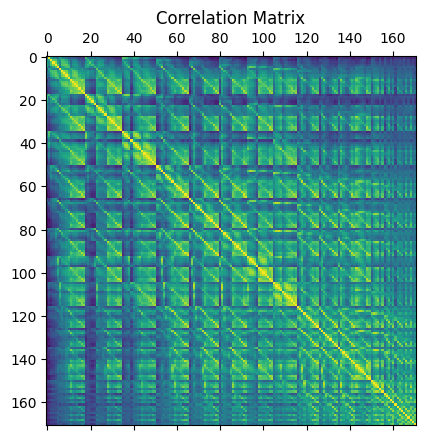

In [50]:
# Correlation matrix with only the COH variables

psd_corr = train_validate[[col for col in train_validate.columns if col.startswith("COH.A.delta")]].corr()
psd_corr.to_numpy()
fig, ax = plt.subplots()
ax.matshow(psd_corr)
ax.set_title("Correlation Matrix")

## Finding columns that highly correlate to others
We may want to drop these columns to avoid redundant features

In [51]:
# Find indexes of the columns with correlation greater than 0.9
corr = corr.abs()
high_corr = corr
high_corr = high_corr.unstack()
high_corr = high_corr[(corr > 0.94).unstack()]

# Eliminate column pairs that are the same as each other
high_corr = high_corr[high_corr.index.get_level_values(0) != high_corr.index.get_level_values(1)]

# Eliminate duplicate pairs
high_corr = high_corr.reset_index()
high_corr = high_corr[high_corr["level_0"] < high_corr["level_1"]]
high_corr.sort_values(by=0, ascending=False)

# Get a list of the columns to drop
# columns_to_drop = high_corr["level_1"].unique()
# columns_to_drop

,level_0,level_1,0
24,AB.C.alpha.a.FP1,AB.C.alpha.b.FP2,0.993842
235,COH.C.alpha.a.FP1.s.O2,COH.C.alpha.b.FP2.s.O2,0.989549
55,AB.C.alpha.e.Fz,AB.C.alpha.f.F4,0.989414
332,COH.C.alpha.e.Fz.r.O1,COH.C.alpha.f.F4.r.O1,0.989005
334,COH.C.alpha.e.Fz.s.O2,COH.C.alpha.f.F4.s.O2,0.988393
...,...,...,...
457,COH.D.beta.f.F4.h.T3,COH.D.beta.h.T3.k.C4,0.940046
141,COH.B.theta.a.FP1.r.O1,COH.B.theta.c.F7.r.O1,0.940041
559,COH.E.highbeta.c.F7.p.P4,COH.E.highbeta.c.F7.q.T6,0.940035
834,COH.F.gamma.d.F3.s.O2,COH.F.gamma.i.C3.s.O2,0.940011


In [52]:
train_validate

,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,AB.A.delta.j.Cz,...,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2,main.disorder_Addictive disorder,main.disorder_Anxiety disorder,main.disorder_Healthy control,main.disorder_Mood disorder,main.disorder_Obsessive compulsive disorder,main.disorder_Schizophrenia,main.disorder_Trauma and stress related disorder
0,2.491668,2.031052,0.807025,1.214992,1.252584,1.893088,0.802875,0.459030,0.977225,1.867991,...,-0.400901,0.441381,-0.289018,0,0,0,1,0,0,0
1,1.203945,0.122913,0.284084,-0.087321,-0.321349,-0.348295,0.655359,-0.526920,-0.365307,-0.151768,...,0.050242,-0.590623,0.343119,0,0,1,0,0,0,0
2,0.939692,0.555656,1.257185,3.211095,0.764717,2.170673,0.884929,1.557960,1.252847,1.811592,...,0.683425,0.025166,1.188447,0,0,0,0,0,1,0
3,-0.526101,-0.593076,-0.695376,-0.559602,-0.596109,-0.771567,-0.908414,-0.533576,-0.711187,-0.675008,...,-0.442123,-0.026292,-0.114340,0,0,0,0,1,0,0
4,0.125161,0.211484,0.172217,0.633887,0.443298,0.290648,0.256593,0.954082,0.622803,0.519063,...,-1.171757,-1.888873,-0.810426,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,0.183676,0.119787,-0.088949,-0.210353,-0.041773,-0.041041,0.057366,0.026106,-0.512178,-0.526291,...,0.664293,0.933488,0.795881,0,0,0,0,0,1,0
848,-0.650464,-0.565014,-0.378542,0.548064,0.105547,0.212094,-0.559495,0.541284,-0.364019,-0.549531,...,-0.754226,0.329352,-0.132937,0,0,0,0,0,0,1
849,-0.024071,-0.771287,-0.204133,-0.802143,-0.603135,-0.936161,-1.225375,-0.841843,-0.426800,-0.495841,...,1.093059,0.734058,1.196615,0,0,0,1,0,0,0
850,0.533037,-0.047564,0.763624,0.434246,0.318195,0.799477,0.954520,0.397516,0.480877,0.401347,...,-0.562079,-1.410256,-0.398203,0,0,0,1,0,0,0


# Looking at Power per disorder by region and band

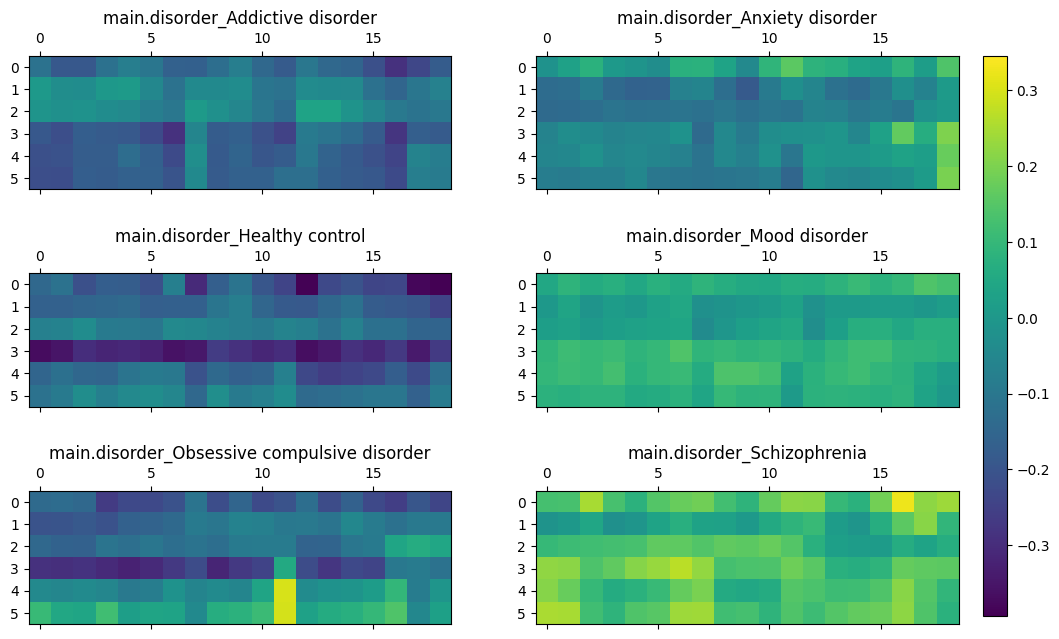

In [53]:
disorders = [col for col in train_validate.columns if "main.disorder_" in col]
psd = train_validate[[col for col in train_validate.columns if "AB" in col or "main.disorder_" in col ]]
disorder_dfs = [psd[psd[col] == 1] for col in disorders]
disorder_dfs = [df.drop(columns=disorders) for df in disorder_dfs]
means = [df.mean() for df in disorder_dfs]
# means[0]
# means[0].to_numpy().reshape(6,19)
fig, ax = plt.subplots(3, 2, figsize=(12, 8))
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position for the colorbar
for i in range(3):
    for j in range(2):
        im = ax[i, j].matshow(means[i * 2 + j].to_numpy().reshape(6, 19), vmin=np.min(means), vmax=np.max(means))
        ax[i, j].set_title(disorders[i * 2 + j])
fig.colorbar(im, cax=cax)

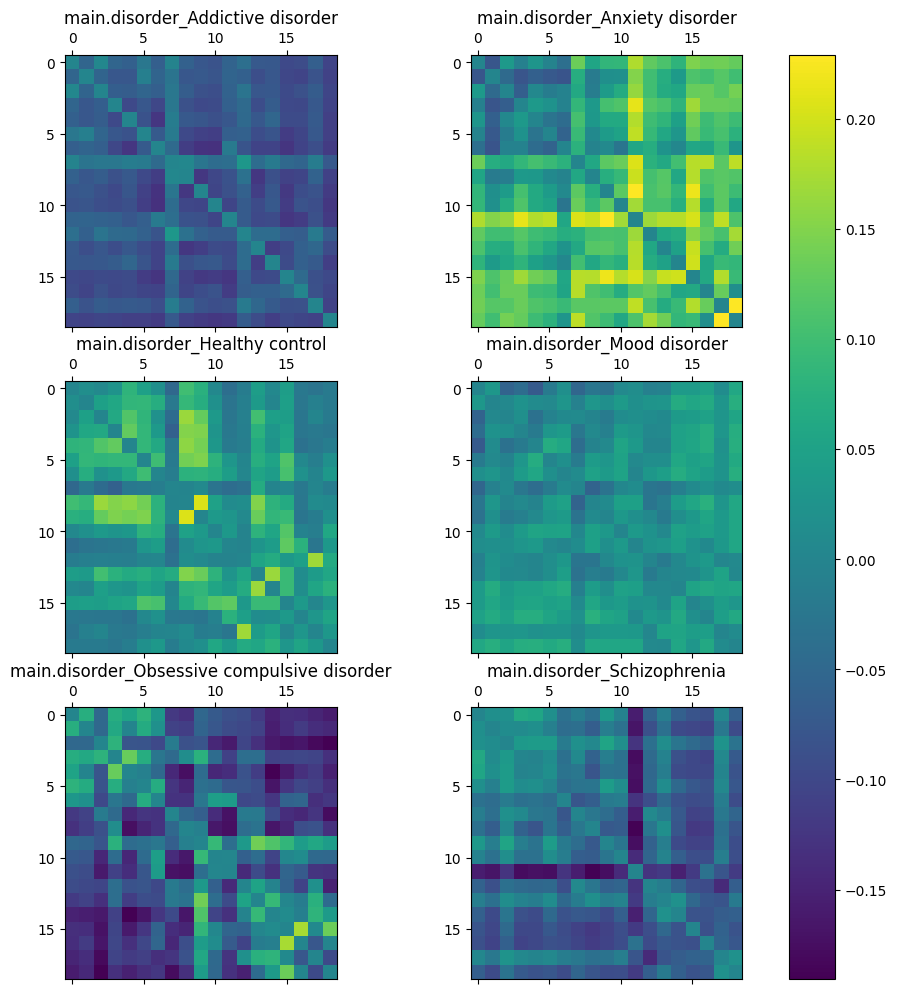

In [54]:
disorders = [col for col in train_validate.columns if "main.disorder_" in col]
coh_cols = [col for col in train_validate.columns if "COH" in col or "main.disorder_" in col ]
psd = train_validate[coh_cols]
disorder_dfs = [psd[psd[col] == 1] for col in disorders]
disorder_dfs = [df.drop(columns=disorders) for df in disorder_dfs]
means = [df.mean() for df in disorder_dfs]
nps = []
for _ in range(len(disorders)):
    nps.append(np.zeros((19,19)))

for col in [col for col in train_validate.columns if "COH" in col]:
    loc1, loc2 = col.split(".")[3], col.split(".")[5]
    for i, disorder in enumerate(disorders):
        nps[i][ord(loc1)-97,ord(loc2)-97] += means[i][col] / 6
        nps[i][ord(loc2)-97,ord(loc1)-97] += means[i][col] / 6

fig, ax = plt.subplots(3, 2, figsize=(12, 12))
for i in range(3):
    for j in range(2):
        cax = ax[i, j].matshow(nps[i * 2 + j], vmin=np.min(nps), vmax=np.max(nps))
        ax[i, j].set_title(disorders[i * 2 + j])
fig.colorbar(cax, ax=ax.ravel().tolist())

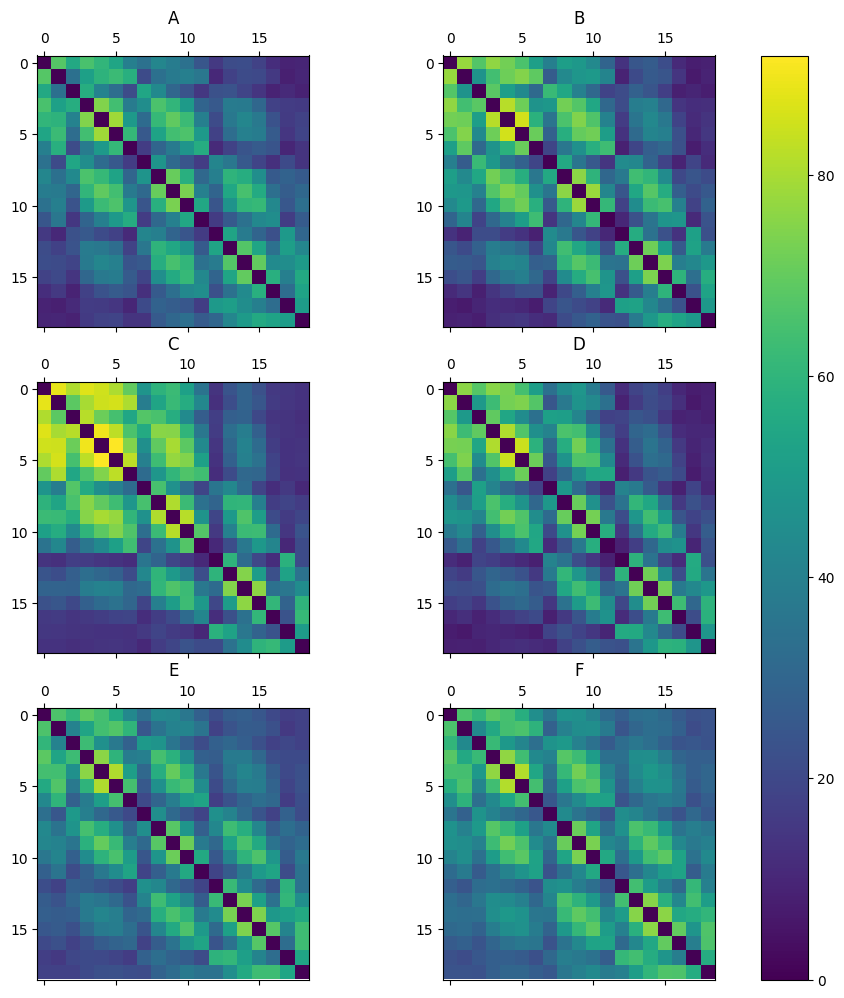

In [76]:
real_data = pd.read_csv("../Data/Train_and_Validate_EEG.csv")
only_coh_cols = [col for col in train_validate.columns if "COH" in col]
psd = real_data[only_coh_cols]

band_coh = [np.zeros((19, 19)) for _ in range(6)]
for col in psd.columns:
    loc1, loc2 = col.split(".")[3], col.split(".")[5]
    band = ord(col.split(".")[1]) - ord('A')
    band_coh[band][ord(loc1)-97,ord(loc2)-97] += psd[col].mean()
    band_coh[band][ord(loc2)-97,ord(loc1)-97] += psd[col].mean()
    
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
for i in range(3):
    for j in range(2):
        cax = ax[i, j].matshow(band_coh[i * 2 + j], vmin=np.min(band_coh), vmax=np.max(band_coh))
        ax[i, j].set_title("ABCDEF"[i * 2 + j])
fig.colorbar(cax, ax=ax.ravel().tolist())

[55.63631895 67.20589759 81.03622427 67.73112176 60.54113969 60.63560023]
(19, 19)


array([[5, 4],
       [4, 5],
       [3, 4]])

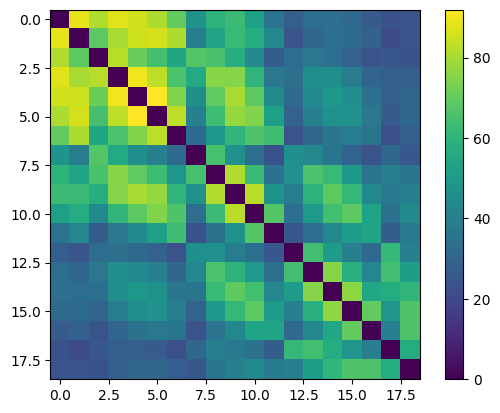

In [ ]:

band_coh = np.array(band_coh)
print(band_coh[:,0,2])
band_coh_max = np.max(band_coh, axis=0)
print(np.array(band_coh_max).shape)
plt.imshow(band_coh_max)
plt.colorbar()

# Find the indices of the top 10 values in band_coh_max, a 2D numpy array of shape (19, 19)

np.array(np.unravel_index(np.argsort(band_coh_max, axis=None), band_coh_max.shape)).transpose()[-1:-4:-1]
# np.array(np.unravel_index(np.argsort(band_coh_max, axis=None), band_coh_max.shape)).transpose()[-50:]

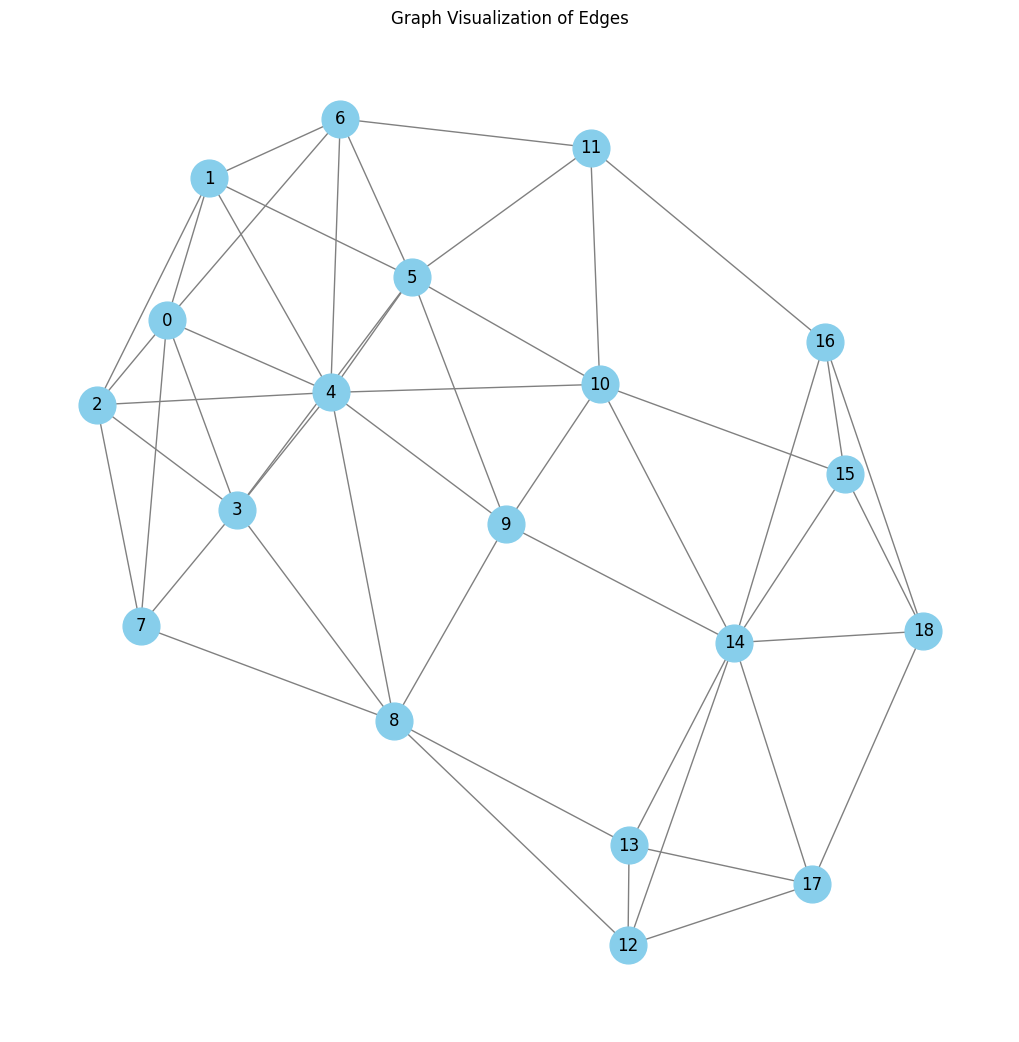

In [ ]:
import networkx as nx

edges = []
for i in range(19):
    edges.append(np.array(np.argsort(band_coh_max[i], axis=None)).transpose()[-1:-5:-1])
edges = np.array(edges)
edges

# Make a graph visualization of these edges
G = nx.Graph()

# Add nodes
for i in range(19):
    G.add_node(i)

# Add edges
for i, edge_list in enumerate(edges):
    for j in edge_list:
        G.add_edge(i, j)

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title("Graph Visualization of Edges")
plt.show()

In [ ]:
# Make a graph visualization of these edges in the previous cell



